# Homework 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 5)

### Problem 1

#### (a)


$ ŷ = -1; if, -0.5 + x_2 < 0 $

$ ŷ = +1; if, -0.5 + x_2 > 0 $


where,

$ b = -0.5 $

$ w_1 = 0 $

$ w_2 = 1 $

#### (b)

$ γ = 0.2 $

#### (c)

$ m = 0.2 $

#### (d)

The samples `i=[1, 2]` are on the margin.

### Problem 2

In [2]:
xi = [0, 1.3, 2.1, 2.8, 4.2, 5.7]
yi = [-1, -1, -1, 1, -1, 1]

#### (a)

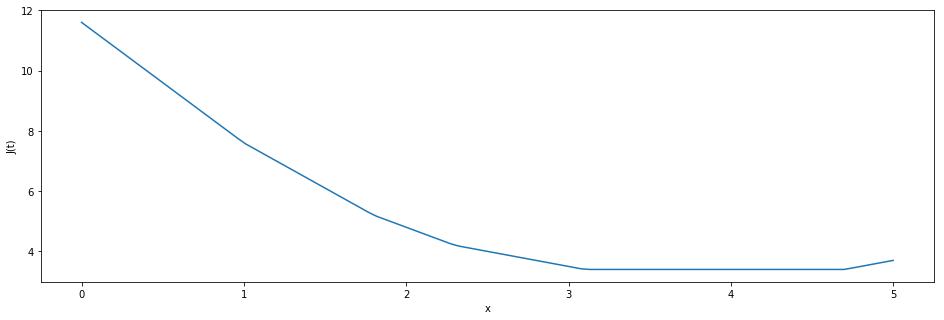

In [3]:
T = np.linspace(0, 5, 100)
J = [np.sum([max(0, tmp) for tmp in (1 - yi*(xi - t))]) for t in T]
plt.plot(T, J)
plt.xlabel('x')
plt.ylabel('J(t)')
plt.show()

#### (b)

In [4]:
t_min = T[np.argmin(J)]
print("J(t) is minimum for t=", t_min)

J(t) is minimum for t= 3.13131313131


#### (c)

In [5]:
ei = [max(0, tmp) for tmp in (1 - yi*(xi - t_min))]
print('The slack variables for t=', str(t_min), 'are:', ei)

The slack variables for t= 3.13131313131 are: [0, 0, 0, 1.3313131313131312, 2.0686868686868691, 0]


#### (d)

The samples `i = [3, 4]` violate the margin and are also misclassified.

### Problem 3

In [6]:
X = np.array([[0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0]])
Xr = np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1]])
Xl = np.array([[0, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0]])
W = np.array([[0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]])
x = X.ravel('F')
w = W.ravel('F')

#### (a)

In [7]:
print('x =', x)
print('w =', w)

x = [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
w = [0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0]


#### (b)

In [8]:
print('z =',np.inner(w.T, x))

z = 2


#### (c)

In [9]:
xr = Xr.ravel('F')
print('z =',np.inner(w.T, xr))

z = 0


#### (d)

In [10]:
xl = Xl.ravel('F')
print('z =',np.inner(w.T, xl))

z = 2


#### (e)

The python command `x = Xmat.ravel('F')` can be used to convert a `4x4` image matrix to `16` dimensional array. The command `Xmat = x.reshape(4, 4)` can be used to go from `x` to `Xmat`.

### Problem 4

In [51]:
xi = [0, 1, 2, 3]
yi = [1, -1, 1, -1]
xrange = np.linspace(-8, 8, 17)

In [52]:
def get_z(gamma, alpha, xrange):
    z = []
    for x in xrange:
        zi = [alpha[i] * yi[i] * np.exp(- (gamma * np.power(xi[i] - x, 2))) for i in range(4)]
        z.append(np.sum(zi))
    return np.array(z)

In [53]:
def get_y(z):
    y = np.zeros(z.shape)
    y[np.where(z > 0)] = 1
    y[np.where(z <= 0)] = -1
    return y

In [54]:
def makeplot(title, z, y, xrange):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    ax1.plot(xrange, z)
    ax1.set_xlabel('Range of X')
    ax1.set_ylabel('Z')
    ax2.scatter(xrange, y)
    ax2.set_xlabel('Range of X')
    ax2.set_ylabel('Predicted Y')
    ax2.set_yticks([-1, 1])
    ax2.grid()
    plt.show()

#### (a)

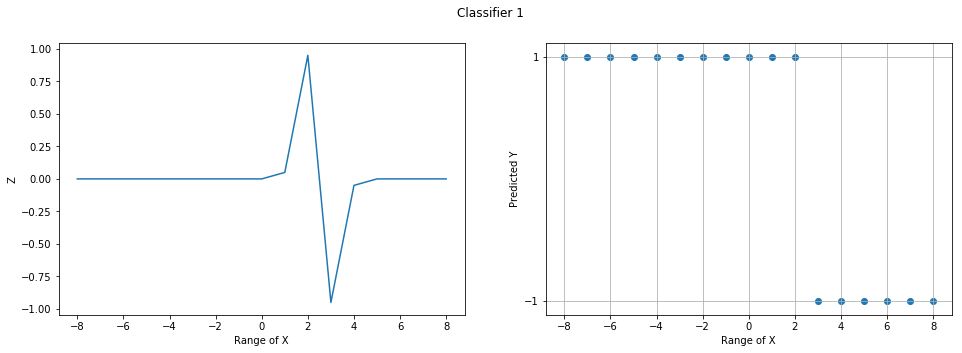

In [55]:
a1 = [0, 0, 1, 1]
g1 = 3
z1 = get_z(g1, a1, xrange)
y1 = get_y(z1)
makeplot('Classifier 1', z1, y1, xrange)

#### (b)

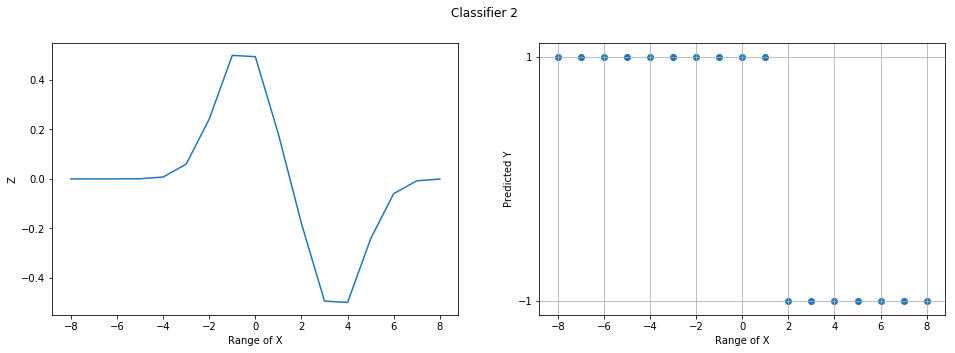

In [56]:
a2 = [1, 1, 1, 1]
g2 = 0.3
z2 = get_z(g2, a2, xrange)
y2 = get_y(z2)
makeplot('Classifier 2', z2, y2, xrange)

#### (c)

From the plots, we can see that Classifier 2 gives 2 errors while Classifier 1 gives 1 error.